In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/kaggle/input/school-shootings/school-shootings-data.csv')
df.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,killed,injured,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965,13,21,34,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783.0,16.0,112,42.0,12.0,NaN,NaN,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,89.6,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588,0,1,1,targeted,14.0,m,NaN,former student (expelled),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,583.0,0,0.0,0.0,NaN,NaN,0,.22 caliber pistol,NaN,30.529958,-91.169966,39.0,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,Conyers,Georgia,public,1369,0,6,6,indiscriminate,15.0,m,w,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189.0,136.0,28,15.0,1.0,NaN,NaN,1,".22 caliber rifle, 357-caliber Magnum handgun",NaN,33.626922,-84.047960,84.0,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147,0,1,1,targeted,17.0,m,NaN,student,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0,2736.0,27,170.0,5.0,NaN,NaN,1,RG .25-caliber pistol,purchased from friend,39.921509,-75.234108,41.0,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,1116,0,1,1,targeted,NaN,m,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,755.0,287,29.0,5.0,NaN,NaN,0,NaN,NaN,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0


In [4]:
df.describe()

,uid,nces_district_id,year,killed,injured,casualties,age_shooter1,shooter_deceased1,age_shooter2,shooter_deceased2,white,black,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,lat,long,staffing,state_fips,county_fips,ulocale
count,387.000000,3.630000e+02,387.000000,387.000000,387.000000,387.000000,274.000000,262.000000,12.000000,6.000000,377.000000,377.000000,377.000000,376.000000,262.000000,262.000000,387.000000,386.000000,386.000000,363.000000,387.000000,387.000000,384.000000
mean,194.542636,2.683346e+06,2014.204134,0.519380,1.108527,1.622739,19.284672,0.152672,16.916667,0.166667,375.193634,354.403183,38.649867,8.436170,5.015267,31.683206,0.271318,37.070614,-92.176124,61.546846,26.679587,26776.191214,19.947917
std,112.678322,1.638245e+06,7.452592,2.171772,2.215958,3.847791,9.748823,0.360359,1.505042,0.408248,464.915289,433.758974,81.618368,25.989355,23.552659,37.592018,0.445215,5.121773,15.553162,38.739547,16.130641,16166.320448,10.668633
min,1.000000,1.000080e+05,1999.000000,0.000000,0.000000,0.000000,6.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.310400,-157.837200,3.000000,1.000000,1009.000000,11.000000
25%,97.500000,1.200480e+06,2008.000000,0.000000,0.000000,0.000000,15.000000,0.000000,15.750000,0.000000,14.000000,26.000000,1.000000,0.000000,0.000000,4.250000,0.000000,33.686293,-97.506534,31.210000,12.000000,12061.000000,11.000000
50%,194.000000,2.614280e+06,2017.000000,0.000000,1.000000,1.000000,16.000000,0.000000,17.000000,0.000000,150.000000,180.000000,8.000000,2.000000,1.000000,17.000000,0.000000,37.044535,-87.582092,55.300000,26.000000,26125.000000,13.000000
75%,290.500000,4.155394e+06,2021.000000,0.000000,1.000000,1.000000,19.000000,0.000000,18.000000,0.000000,592.000000,574.000000,34.000000,6.000000,2.000000,46.750000,1.000000,40.647249,-80.818711,86.050000,41.000000,41045.000000,22.000000
max,391.000000,5.516470e+06,2023.000000,26.000000,21.000000,34.000000,72.000000,1.000000,20.000000,1.000000,2256.000000,2736.000000,846.000000,331.000000,338.000000,199.000000,1.000000,61.213281,-70.952603,203.320000,55.000000,55139.000000,43.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uid                               387 non-null    int64  
 1   nces_school_id                    381 non-null    object 
 2   school_name                       387 non-null    object 
 3   nces_district_id                  363 non-null    float64
 4   district_name                     362 non-null    object 
 5   date                              387 non-null    object 
 6   school_year                       387 non-null    object 
 7   year                              387 non-null    int64  
 8   time                              363 non-null    object 
 9   day_of_week                       387 non-null    object 
 10  city                              387 non-null    object 
 11  state                             387 non-null    object 
 12  school_t

In [6]:
df['shooting_type'].unique()

array(['indiscriminate', 'targeted', 'accidental or targeted',
       'accidental', 'targeted and indiscriminate', 'hostage suicide',
       'public suicide (attempted)', 'public suicide', 'unclear',
       'suicide'], dtype=object)

In [7]:
for col in df.columns:
    if df[col].dtype == "object":  # equivalent to str in pandas
        df[col].fillna("N/A", inplace=True)
    elif df[col].dtype in ["int64", "float64"]:
        df[col].fillna(0, inplace=True)

df.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,city,state,school_type,enrollment,killed,injured,casualties,shooting_type,age_shooter1,gender_shooter1,race_ethnicity_shooter1,shooter_relationship1,shooter_deceased1,deceased_notes1,age_shooter2,gender_shooter2,race_ethnicity_shooter2,shooter_relationship2,shooter_deceased2,deceased_notes2,white,black,hispanic,asian,american_indian_alaska_native,hawaiian_native_pacific_islander,two_or_more,resource_officer,weapon,weapon_source,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,Littleton,Colorado,public,1965,13,21,34,indiscriminate,18.0,m,w,student,1.0,suicide,17.0,m,w,student,1.0,suicide,1783.0,16.0,112,42.0,12.0,0.0,0.0,1,12-gauge Savage-Springfield 67H pump-action sh...,purchased from friends,39.603910,-105.075000,89.6,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,Baton Rouge,Louisiana,public,588,0,1,1,targeted,14.0,m,N/A,former student (expelled),0.0,N/A,0.0,N/A,N/A,N/A,0.0,N/A,5.0,583.0,0,0.0,0.0,0.0,0.0,0,.22 caliber pistol,N/A,30.529958,-91.169966,39.0,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,Conyers,Georgia,public,1369,0,6,6,indiscriminate,15.0,m,w,student,0.0,N/A,0.0,N/A,N/A,N/A,0.0,N/A,1189.0,136.0,28,15.0,1.0,0.0,0.0,1,".22 caliber rifle, 357-caliber Magnum handgun",N/A,33.626922,-84.047960,84.0,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,Philadelphia,Pennsylvania,public,3147,0,1,1,targeted,17.0,m,N/A,student,0.0,N/A,0.0,N/A,N/A,N/A,0.0,N/A,209.0,2736.0,27,170.0,5.0,0.0,0.0,1,RG .25-caliber pistol,purchased from friend,39.921509,-75.234108,41.0,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,Boston,Massachusetts,public,1116,0,1,1,targeted,0.0,m,N/A,N/A,0.0,N/A,0.0,N/A,N/A,N/A,0.0,N/A,40.0,755.0,287,29.0,5.0,0.0,0.0,0,N/A,N/A,42.285268,-71.075901,0.0,9,12,543,Suffolk County,25,25025,11.0


In [8]:
casualties_by_day = df.groupby('day_of_week')['casualties'].sum().reset_index()

fig = px.bar(casualties_by_day, x='day_of_week', y='casualties', title='Casualties by Day of the Week')
fig.show()

Most shootings happen on Tuesdays

In [9]:
casualties_by_year = df.groupby('year')['casualties'].sum().reset_index()
mean_casualties = casualties_by_year['casualties'].mean()

fig3 = px.bar(casualties_by_year, x='year', y='casualties', title='Casualties Over the Years').add_hline(y=mean_casualties, 
                       line_dash='dash', 
                       line_color='grey', 
                       annotation_text=f"Mean: {mean_casualties:.2f}", 
                       annotation_position="top right")
fig3.show()

fig3_histogram = px.histogram(casualties_by_year, x='year', y='casualties', title='Casualties Over the Years')
fig3_histogram.show()

School Shooting's casualties have been  rising latelly

In [10]:
casualties_by_shooting_type = df.groupby('shooting_type')['casualties'].sum().reset_index()
casualties_by_shooting_type = casualties_by_shooting_type[casualties_by_shooting_type['casualties'] != 0]

fig2 = px.bar(casualties_by_shooting_type.sort_values(by='casualties', ascending=False), x='shooting_type', y='casualties', title='Casualties by Shooting Type')
fig2.show()

Most shooters simply want to shoot indiscriminatelly or have a target in mind.

In [11]:
casualties_by_school_type = df.groupby('school_type')['casualties'].sum().reset_index()

fig3 = px.bar(casualties_by_school_type, x='school_type', y='casualties', title='Casualties by School Type').update_layout(yaxis=dict(
))
fig3.show()

Most shootings happen on public schools. Maybe because of bullying?

In [12]:
casualties_by_state = df.groupby('state')['casualties'].sum().reset_index()

fig3 = px.bar(casualties_by_state.sort_values(by='casualties', ascending=False), x='state', y='casualties', title='Casualties by School Type').update_layout(yaxis=dict(
    tickvals=None,
    ticktext=None 
))
fig3.show()

I'm not from USA, but I know that California has a huge population, so we can't say that weapon laws being more restrictive affects negativelly the amount of casualties, since the other top 2 states (Texas and Florida) have more permissive laws on this behavior.

In [13]:
gender_counts = df['gender_shooter1'].value_counts().reset_index()
gender_counts.columns = ['gender_shooter1', 'count']

fig_gender = px.bar(gender_counts, x='gender_shooter1', y='count', title='Occurrences by Gender of Shooter 1')
fig_gender.show()

Most school shootings are done by male people.

In [14]:
from wordcloud import WordCloud

stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once", "N/A"
])

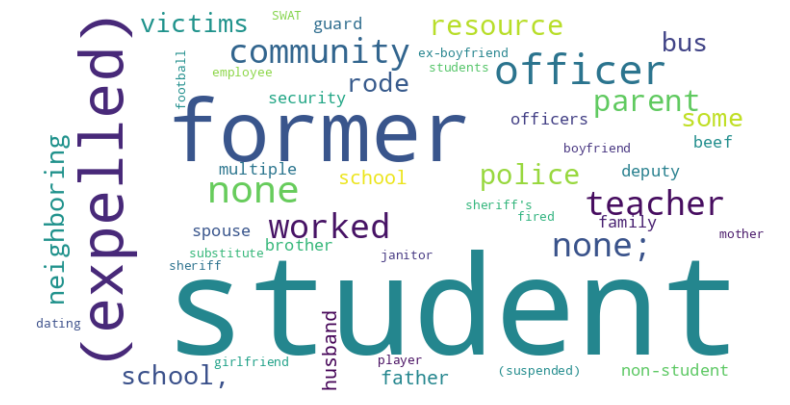

In [15]:
words_df = df['shooter_relationship1'].str.split(expand=True).melt(ignore_index=False, value_name='word').dropna()[['word']]

merged_df = words_df.merge(df['casualties'], left_index=True, right_index=True)

word_weights = merged_df.groupby('word')['casualties'].sum()

filtered_word_weights = word_weights[~word_weights.index.isin(stopwords)]

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(filtered_word_weights)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The words that appear the most on the shooter's relatioship with the school where the shooting occured are "Student", "Former" and "Expelled", which indicates that it's more common that a shooting occurs by students that had some sort of relationship with the school

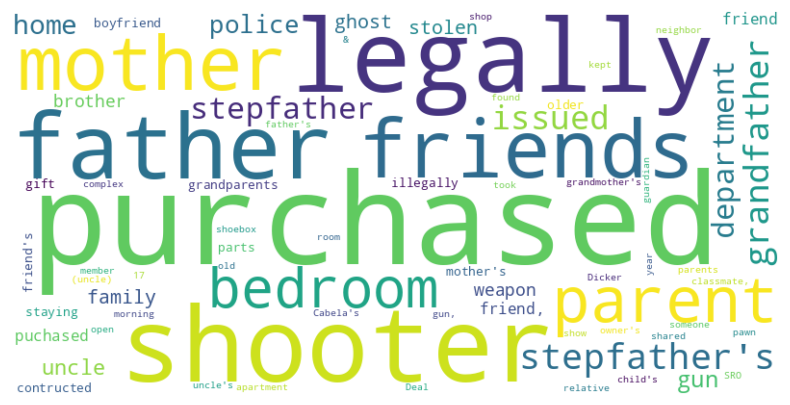

In [16]:
words_df = df['weapon_source'].str.split(expand=True).melt(ignore_index=False, value_name='word').dropna()[['word']]

merged_df = words_df.merge(df['casualties'], left_index=True, right_index=True)

word_weights = merged_df.groupby('word')['casualties'].sum()

filtered_word_weights = word_weights[~word_weights.index.isin(stopwords)]

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(filtered_word_weights)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most of the shooting's authors got their weapons from parents or other family members, who bought them legally

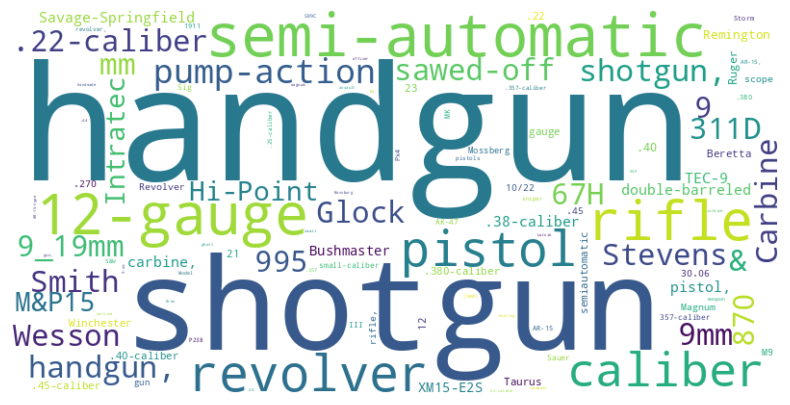

In [17]:
words_df = df['weapon'].str.split(expand=True).melt(ignore_index=False, value_name='word').dropna()[['word']]

merged_df = words_df.merge(df['casualties'], left_index=True, right_index=True)

word_weights = merged_df.groupby('word')['casualties'].sum()

filtered_word_weights = word_weights[~word_weights.index.isin(stopwords)]

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(filtered_word_weights)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most weapons are discrete ones, like a handgun, revolver or semi-automatics. But there is a high frequency of more violent weapons, like shotguns, also.

In [18]:
from plotly.express import scatter_geo

casualties_by_location = df.groupby('state')['casualties'].sum().reset_index()
first_lat_long_by_state = df.groupby('state')[['lat', 'long']].first().reset_index()

casualties_by_location = casualties_by_location.merge(first_lat_long_by_state, on='state', how='left')

casualties_by_location.head()

fig_location = px.scatter_geo(casualties_by_location,
                     lat='lat',
                     lon='long',
                     title='Casualties by Location',
                     hover_name='state',
                     size='casualties',
                     template='plotly',
                     projection="albers usa",
                             height=800)
fig_location.show()